# Task 
1. `data_coffee.csv`를 읽어온다.
2. 매장의규모(`sizeOfsite`) 변수를 요약한다.
3. `sizeOfsite`의 결측치(NA)를 제거하고 히스토그램을 그린다.
4. 매장 규모가 500인 이상인 `outlier`를 제외하고 히스토그램을 그린다.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

데이터 불러오기 

In [2]:
os.chdir(r"C:\myPyCode2\01 Python 분석 기초 - 실습\data")

In [17]:
df0 = pd.read_csv('data_coffee.csv', header='infer',encoding = 'ms949', na_values=[' '])

In [18]:
pd.unique(df0.sizeOfsite)

array([ 20.8 , 212.72,  20.04, ...,  29.06, 199.76, 176.49])

In [19]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46832 entries, 0 to 46831
Data columns (total 23 columns):
number                  46832 non-null int64
companyName             46832 non-null object
adress                  46600 non-null object
adressBystreet          39548 non-null object
dateOflicensing         46832 non-null int64
stateOfbusiness         46832 non-null object
dateOfclosure           13245 non-null float64
startdateOfcessation    0 non-null float64
duedateOfcessation      0 non-null float64
dateOfreOpen            0 non-null float64
areaOfsite              0 non-null float64
zip                     0 non-null float64
waterwork               29610 non-null object
numOfmenWorker          5918 non-null float64
yearOfStart             46813 non-null float64
multipleUse             46813 non-null object
grade                   3775 non-null object
sizeOfsite              46813 non-null float64
numOfwomenWorker        7042 non-null float64
vicintyOfsite           12894 no

In [20]:
header = df0.columns
header

Index(['number', 'companyName', 'adress', 'adressBystreet', 'dateOflicensing',
       'stateOfbusiness', 'dateOfclosure', 'startdateOfcessation',
       'duedateOfcessation', 'dateOfreOpen', 'areaOfsite', 'zip', 'waterwork',
       'numOfmenWorker', 'yearOfStart', 'multipleUse', 'grade', 'sizeOfsite',
       'numOfwomenWorker', 'vicintyOfsite', 'sanitaryName',
       'businessCondition', 'totalOfworker'],
      dtype='object')

In [21]:
(df0.isnull()).sum(axis=0)

number                      0
companyName                 0
adress                    232
adressBystreet           7284
dateOflicensing             0
stateOfbusiness             0
dateOfclosure           33587
startdateOfcessation    46832
duedateOfcessation      46832
dateOfreOpen            46832
areaOfsite              46832
zip                     46832
waterwork               17222
numOfmenWorker          40914
yearOfStart                19
multipleUse                19
grade                   43057
sizeOfsite                 19
numOfwomenWorker        39790
vicintyOfsite           33938
sanitaryName               19
businessCondition          19
totalOfworker           41295
dtype: int64

In [22]:
(df0.isnull()).mean(axis=0)

number                  0.000000
companyName             0.000000
adress                  0.004954
adressBystreet          0.155535
dateOflicensing         0.000000
stateOfbusiness         0.000000
dateOfclosure           0.717181
startdateOfcessation    1.000000
duedateOfcessation      1.000000
dateOfreOpen            1.000000
areaOfsite              1.000000
zip                     1.000000
waterwork               0.367740
numOfmenWorker          0.873633
yearOfStart             0.000406
multipleUse             0.000406
grade                   0.919393
sizeOfsite              0.000406
numOfwomenWorker        0.849633
vicintyOfsite           0.724675
sanitaryName            0.000406
businessCondition       0.000406
totalOfworker           0.881769
dtype: float64

In [23]:
#x0 = np.array(df0.loc[:,'sizeOfsite'].dropna())
x0 = df0.loc[:,'sizeOfsite'].dropna()

In [24]:
x0.shape

(46813,)

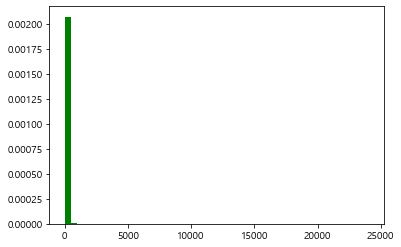

In [34]:
plt.hist(x0, bins=50, color='green', density=True)
plt.show()

In [26]:
x=x0[x0 < 500]

In [30]:
pd.unique(x0).max()

24075.0

In [32]:
x0.describe()

count    46813.000000
mean        75.531012
std        135.088745
min          0.000000
25%         28.120000
50%         50.000000
75%         93.750000
max      24075.000000
Name: sizeOfsite, dtype: float64

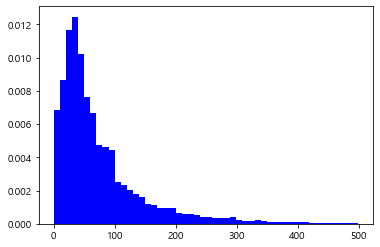

In [27]:
plt.hist(x,bins=50,color='blue', density=True)
plt.show()

로그변환(0이 아닌 양수인 실수)

In [41]:
x=x0[(x0 < 500)& (x0>0)]

C:\Users\heaja\Anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\heaja\Anaconda3\envs\myenv\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


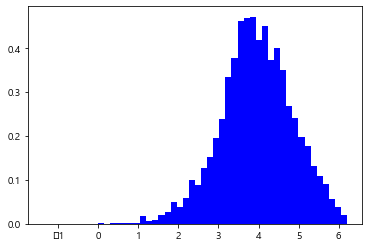

In [42]:
plt.hist(np.log(x),bins=50,color='blue', density=True)
plt.show()